<a href="https://colab.research.google.com/github/Mounika-Alwar/ML-Practice/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Batch, Stochastic, and Mini-batch Gradient Descent for Linear Regression.

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Batch Gradient Descent

In [5]:
batch_reg = SGDRegressor(max_iter=1,  # we’ll iterate manually
                         learning_rate='constant',
                         eta0=0.01,
                         penalty='l2',
                         shuffle=False,
                         random_state=42)

n_epochs = 50
batch_loss = []

for epoch in range(n_epochs):
    batch_reg.partial_fit(X_train, y_train)
    y_pred = batch_reg.predict(X_train)
    batch_loss.append(mean_squared_error(y_train, y_pred))

y_pred_batch = batch_reg.predict(X_test)
mse_batch = mean_squared_error(y_test, y_pred_batch)
print("Batch GD Final MSE:", mse_batch)


Batch GD Final MSE: 2860.549007485387


## Stochastic Gradient Descent

Simulate SGD per sample with shuffle=True

In [6]:
sgd_reg = SGDRegressor(max_iter=1,
                       learning_rate='constant',
                       eta0=0.01,
                       penalty='l2',
                       shuffle=True,
                       random_state=42)

sgd_loss = []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train, y_train)
    y_pred = sgd_reg.predict(X_train)
    sgd_loss.append(mean_squared_error(y_train, y_pred))

y_pred_sgd = sgd_reg.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("Stochastic GD Final MSE:", mse_sgd)


Stochastic GD Final MSE: 2978.173042244942


## Mini-batch Gradient Descent

In [7]:
mini_reg = SGDRegressor(max_iter=1,
                        learning_rate='constant',
                        eta0=0.01,
                        penalty='l2',
                        random_state=42)

batch_size = 32
mini_loss = []

for epoch in range(n_epochs):
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    for start in range(0, X_train.shape[0], batch_size):
        end = start + batch_size
        X_batch = X_train_shuffled[start:end]
        y_batch = y_train_shuffled[start:end]
        mini_reg.partial_fit(X_batch, y_batch)

    y_pred = mini_reg.predict(X_train)
    mini_loss.append(mean_squared_error(y_train, y_pred))

y_pred_mini = mini_reg.predict(X_test)
mse_mini = mean_squared_error(y_test, y_pred_mini)
print("Mini-batch GD Final MSE:", mse_mini)


Mini-batch GD Final MSE: 2785.9405281041


# Plot Convergence

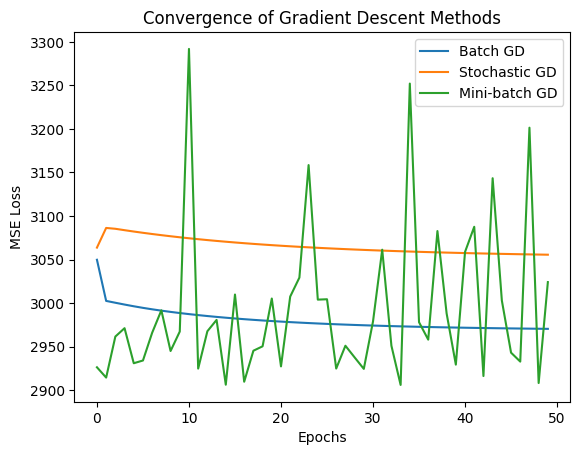

In [8]:
plt.plot(batch_loss, label='Batch GD')
plt.plot(sgd_loss, label='Stochastic GD')
plt.plot(mini_loss, label='Mini-batch GD')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence of Gradient Descent Methods")
plt.legend()
plt.show()
